In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('results.csv')
df.head()

,Test,Database,Iteration,Time (s),Initial CPU (%),Final CPU (%),Initial Memory,Final Memory
0,Insert Time,Postgres,1,2.423419,0.00%,0.02%,37.01MiB / 5GiB,43.59MiB / 5GiB
1,Insert Time,Postgres,2,2.627238,0.01%,0.02%,43.58MiB / 5GiB,44.58MiB / 5GiB
2,Insert Time,Postgres,3,2.654358,0.01%,0.02%,44.58MiB / 5GiB,44.84MiB / 5GiB
3,Insert Time,Postgres,4,2.641859,0.00%,0.02%,44.84MiB / 5GiB,45.05MiB / 5GiB
4,Insert Time,Postgres,5,2.626949,0.02%,0.02%,45.05MiB / 5GiB,44.82MiB / 5GiB


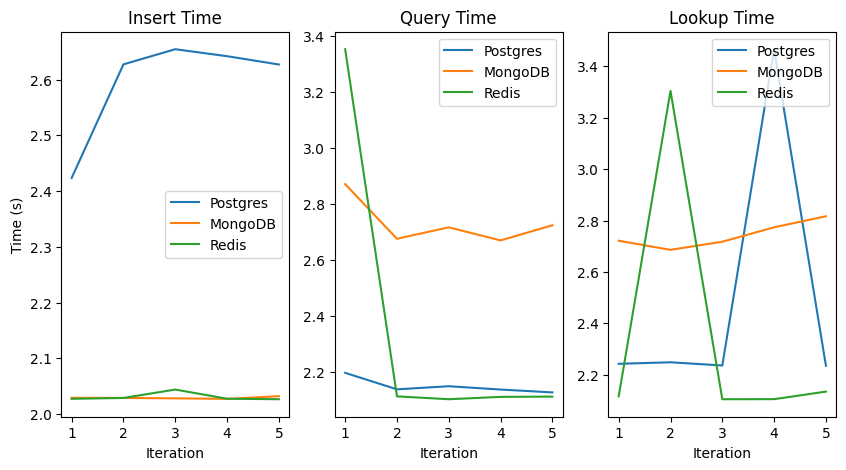

<Figure size 1000x500 with 0 Axes>

In [25]:
# Plotting result data on line graph
df_insert_time = df[df['Test'] == 'Insert Time']
df_query_time = df[df['Test'] == 'Query Time']
df_lookup_time = df[df['Test'] == 'Lookup Time']

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
for db in df_insert_time['Database'].unique():
    db_data = df_insert_time[df_insert_time['Database'] == db]
    plt.plot(db_data['Iteration'], db_data['Time (s)'], label=db)
    plt.title('Insert Time')
    plt.xlabel('Iteration')
    plt.ylabel('Time (s)')
    plt.legend()

plt.subplot(1, 3, 2)
for db in df_query_time['Database'].unique():
    db_data = df_query_time[df_query_time['Database'] == db]
    plt.plot(db_data['Iteration'], db_data['Time (s)'], label=db)
    plt.title('Query Time')
    plt.xlabel('Iteration')
    plt.legend()

plt.subplot(1, 3, 3)
for db in df_lookup_time['Database'].unique():
    db_data = df_lookup_time[df_lookup_time['Database'] == db]
    plt.plot(db_data['Iteration'], db_data['Time (s)'], label=db)
    plt.title('Lookup Time')
    plt.xlabel('Iteration')
    # plt.ylabel('Time')
    plt.legend()
    
plt.figure(figsize=(10, 5))
plt.tight_layout()
plt.show()

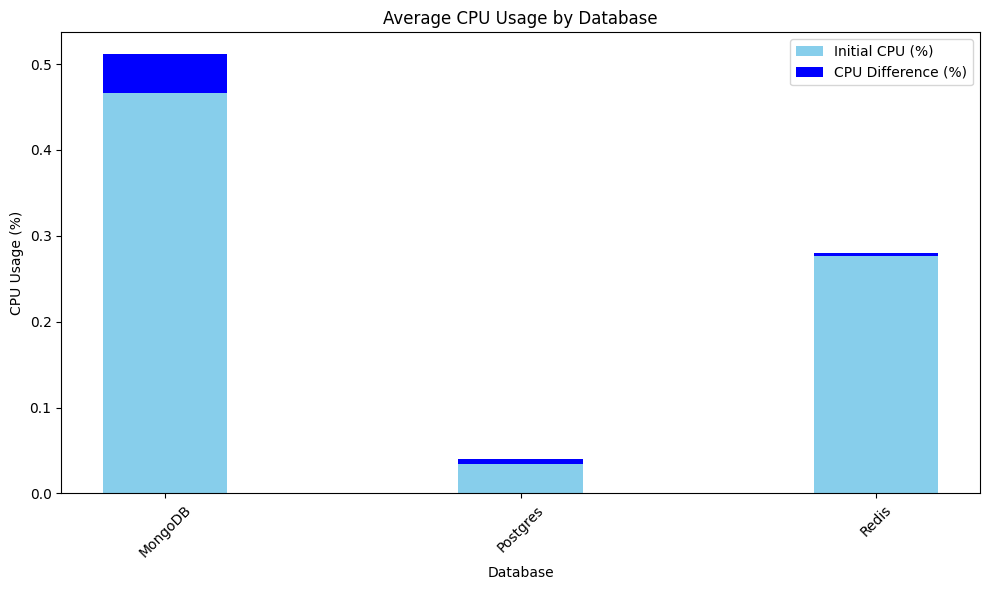

In [26]:
# Calculate average usage for each database
# Preprocess the CPU columns to extract numeric values
df['Initial CPU (%)'] = df['Initial CPU (%)'].str.strip('%').astype(float)
df['Final CPU (%)'] = df['Final CPU (%)'].str.strip('%').astype(float)

# Calculate average usage for each database
avg_usage = df.groupby('Database').agg({
	'Initial CPU (%)': 'mean',
	'Final CPU (%)': 'mean',
}).reset_index()

# Add a column for CPU Difference
avg_usage['CPU Difference (%)'] = avg_usage['Final CPU (%)'] - avg_usage['Initial CPU (%)']

# Define x as the unique databases
x = avg_usage['Database']
width = 0.35  # Set the width of the bars

# Plot CPU usage
fig, ax_cpu = plt.subplots(figsize=(10, 6))
ax_cpu.bar(x, avg_usage['Initial CPU (%)'], width, label='Initial CPU (%)', color='skyblue')
ax_cpu.bar(x, avg_usage['CPU Difference (%)'], width, bottom=avg_usage['Initial CPU (%)'], label='CPU Difference (%)', color='blue')

# Customize CPU plot
ax_cpu.set_xlabel('Database')
ax_cpu.set_ylabel('CPU Usage (%)')
ax_cpu.set_title('Average CPU Usage by Database')
ax_cpu.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

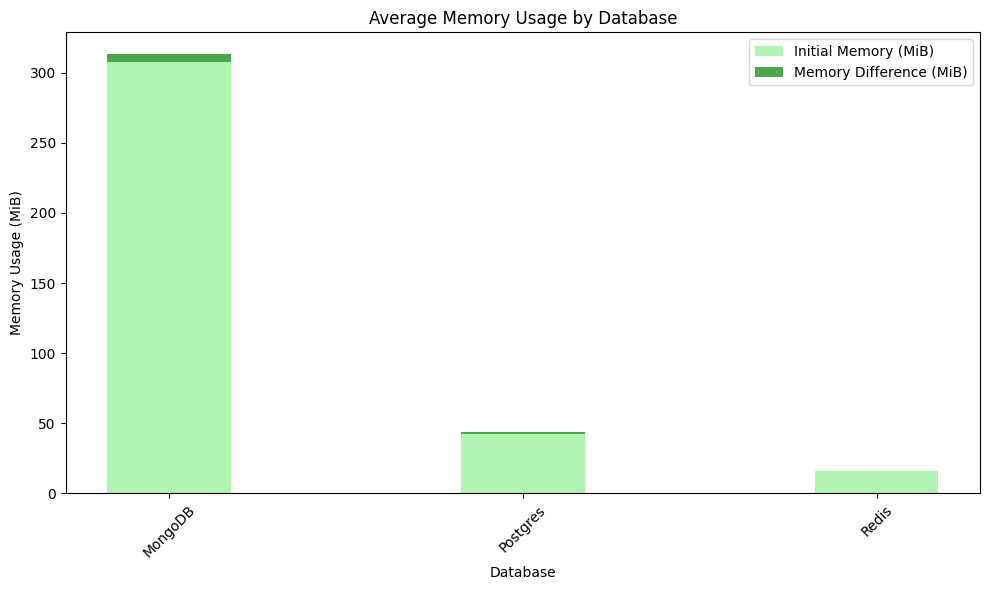

In [27]:
# Preprocess the memory columns to extract numeric values
df['Initial Memory (MiB)'] = df['Initial Memory'].str.split('MiB').str[0].str.strip().astype(float)
df['Final Memory (MiB)'] = df['Final Memory'].str.split('MiB').str[0].str.strip().astype(float)

# Calculate average usage for each database
avg_usage = df.groupby('Database').agg({
	'Initial Memory (MiB)': 'mean',
	'Final Memory (MiB)': 'mean'
}).reset_index()

# Add a column for Memory Difference
avg_usage['Memory Difference (MiB)'] = avg_usage['Final Memory (MiB)'] - avg_usage['Initial Memory (MiB)']

# Plot Memory usage
fig, ax_memory = plt.subplots(figsize=(10, 6))
ax_memory.bar(x, avg_usage['Initial Memory (MiB)'], width, label='Initial Memory (MiB)', color='lightgreen', alpha=0.7)
ax_memory.bar(x, avg_usage['Memory Difference (MiB)'], width, bottom=avg_usage['Initial Memory (MiB)'], label='Memory Difference (MiB)', color='green', alpha=0.7)

# Customize Memory plot
ax_memory.set_xlabel('Database')
ax_memory.set_ylabel('Memory Usage (MiB)')
ax_memory.set_title('Average Memory Usage by Database')
ax_memory.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()